In [4]:
import numpy as np
import pandas as pd

In [5]:
import h2o
!pip show h2o

Name: h2o
Version: 3.46.0.4
Summary: H2O, Fast Scalable Machine Learning, for python 
Home-page: https://github.com/h2oai/h2o-3.git
Author: H2O.ai
Author-email: support@h2o.ai
License: Apache v2
Location: C:\Users\Izza\my_ds_project\myenv\Lib\site-packages
Requires: requests, tabulate
Required-by: 


In [6]:
from h2o.automl import H2OAutoML
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# modeling
from sklearn.ensemble import RandomForestClassifier

# for model accuracy
from sklearn.metrics import accuracy_score

# for scaling
from sklearn.preprocessing import StandardScaler

#for hyperparameter 
import optuna

import warnings
warnings.filterwarnings("ignore")
#initilize the h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321.

c:\Users\Izza\my_ds_project\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 connected.


H2O_cluster_uptime:,4 mins 26 secs
H2O_cluster_timezone:,Asia/Jakarta
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_Izza_pz1v6g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.802 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [7]:
dataAir = pd.read_csv('water_potability.csv')

In [8]:
dataAir.head(50)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Potability
0    1998
1    1278
Name: count, dtype: int64


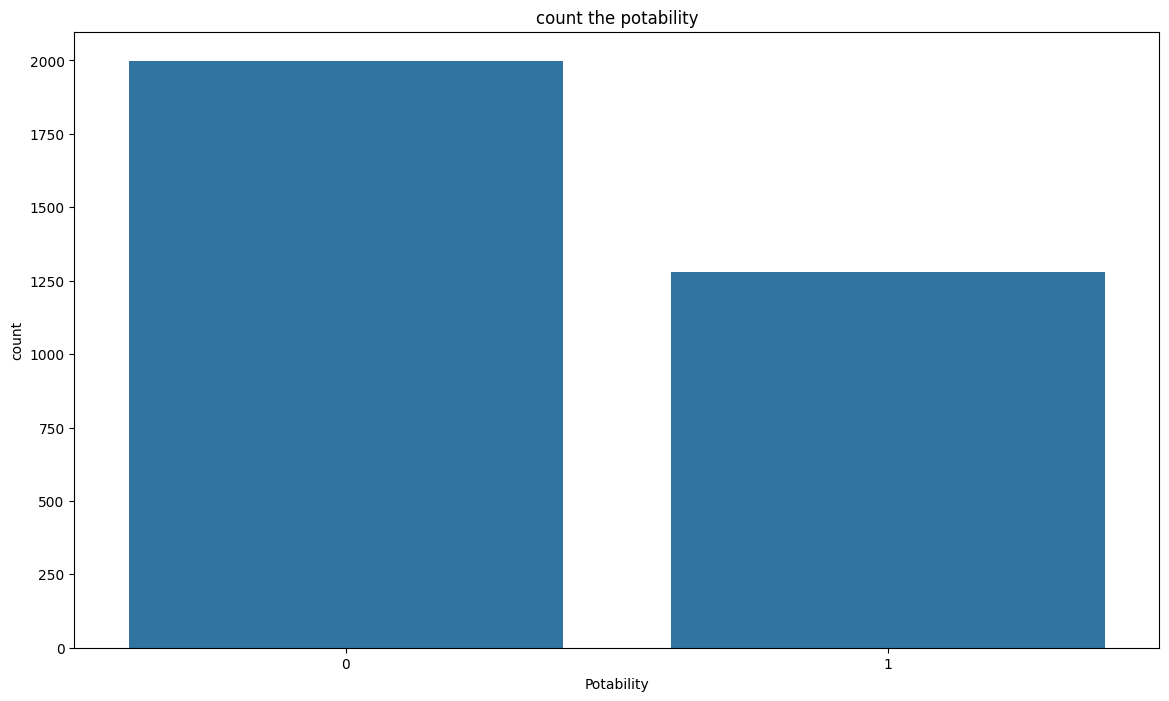

In [9]:
print(dataAir.Potability.value_counts())
plt.figure(figsize=(14,8))
sns.countplot(data = dataAir, x=dataAir.Potability)
plt.title('count the potability')
plt.show()

In [10]:
null_values= ['ph','Sulfate','Trihalomethanes']

In [11]:
for i in null_values:
    dataAir[i] = dataAir[i].replace(np.nan, dataAir[i].mean())

dataAir.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
for feature in dataAir:
    Q1 = dataAir[feature].quantile(0.25)
    Q3 = dataAir[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if dataAir[(dataAir[feature]>upper)].any(axis=None):
        print(feature, "---> theres are outliers here ")
    else:
        print(feature, " ---> everything is good ")

ph ---> theres are outliers here 
Hardness ---> theres are outliers here 
Solids ---> theres are outliers here 
Chloramines ---> theres are outliers here 
Sulfate ---> theres are outliers here 
Conductivity ---> theres are outliers here 
Organic_carbon ---> theres are outliers here 
Trihalomethanes ---> theres are outliers here 
Turbidity ---> theres are outliers here 
Potability  ---> everything is good 


In [13]:
target = 'Potability'
features = dataAir.columns.drop(target)

In [14]:
# # Function to remove outliers using IQR
# def remove_outliers(dataAir, columns):
#     for column in columns:
#         Q1 = dataAir[column].quantile(0.25)
#         Q3 = dataAir[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         dataAir = dataAir[(dataAir[column] >= lower_bound) & (dataAir[column] <= upper_bound)]
#     return dataAir

# # Remove outliers from the specified columns
# dataAir = remove_outliers(dataAir,features)

# plt.figure(figsize=(12, 10))
# for i, column in enumerate(dataAir.columns, 1):
#     plt.subplot(6, 6, i)
#     sns.boxplot(y=dataAir[column],color='skyblue')
#     plt.title(column)

# plt.tight_layout()
# plt.show()

In [15]:
X = dataAir[features]
y = dataAir[target]

In [16]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled, columns=X.columns)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_train_pred = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.6784


In [20]:
train, test = train_test_split(dataAir, test_size=0.2, random_state=42)

In [21]:
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [22]:
aml = H2OAutoML(max_runtime_secs=500,
               balance_classes=True,
               max_models =20,
               seed =10,
               verbosity='info',
               nfolds=2)

In [23]:
target = 'Potability'
features = dataAir.columns.tolist()
features.remove(target)

In [24]:
aml.train(x=features, y=target, training_frame = train_h2o)

AutoML progress: |█
10:22:49.832: Project: AutoML_1_20240828_102249
10:22:49.832: Setting stopping tolerance adaptively based on the training frame: 0.01953661662911409
10:22:49.832: Build control seed: 10
10:22:49.832: training frame: Frame key: AutoML_1_20240828_102249_training_Key_Frame__upload_bb90f4d15185abb292d168a65cf04cde.hex    cols: 10    rows: 2620  chunks: 1    size: 189650  checksum: 4155354496551369742
10:22:49.832: validation frame: NULL
10:22:49.832: leaderboard frame: NULL
10:22:49.832: blending frame: NULL
10:22:49.832: response column: Potability
10:22:49.832: fold column: null
10:22:49.832: weights column: null
10:22:49.849: AutoML: XGBoost is not available; skipping it.
10:22:49.858: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/28
# GBM base models (used / total),5/25
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [25]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240828_102249,0.470756,0.221611,0.444583,0.33113,0.221611
StackedEnsemble_BestOfFamily_1_AutoML_1_20240828_102249,0.472066,0.222846,0.446187,0.332137,0.222846
GBM_grid_1_AutoML_1_20240828_102249_model_5,0.472551,0.223304,0.443497,0.33269,0.223304
GBM_grid_1_AutoML_1_20240828_102249_model_14,0.475134,0.225752,0.437382,0.33373,0.225752
GBM_grid_1_AutoML_1_20240828_102249_model_18,0.476559,0.227109,0.452905,0.335018,0.227109
DRF_1_AutoML_1_20240828_102249,0.477221,0.22774,0.444049,0.33607,0.22774
XRT_1_AutoML_1_20240828_102249,0.477291,0.227806,0.441052,0.335711,0.227806
GBM_3_AutoML_1_20240828_102249,0.477301,0.227816,0.448864,0.335726,0.227816
GBM_grid_1_AutoML_1_20240828_102249_model_17,0.477456,0.227964,0.452597,0.335799,0.227964
GBM_grid_1_AutoML_1_20240828_102249_model_16,0.477534,0.228039,0.450666,0.335705,0.228039


In [26]:
best_model = aml.leader


# evaluate performance on test data
perf = best_model.model_performance(test_h2o)

print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.20725011170677915
RMSE: 0.45524730829163523
MAE: 0.4284837013902894
RMSLE: 0.3229501570645461
Mean Residual Deviance: 0.20725011170677915
R^2: 0.1128125092367449
Null degrees of freedom: 655
Residual degrees of freedom: 648
Null deviance: 153.58208962181703
Residual deviance: 135.95607327964711
AIC: 847.2155670071858


In [27]:
# predict on test data 
predictions = best_model.predict(test_h2o)

# convert to pandas df
pred_df = predictions.as_data_frame()
print(pred_df.head())

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
    predict
0  0.345885
1  0.358091
2  0.302357
3  0.531693
4  0.395474


In [28]:
pred_df['predict'] = pred_df['predict'].apply(lambda x: 1 if x>0.5 else 0)
print(pred_df['predict'].head())

0    0
1    0
2    0
3    1
4    0
Name: predict, dtype: int64


In [29]:
actual_df = test[target]
actual_df.head()

2947    0
2782    1
1644    0
70      0
2045    1
Name: Potability, dtype: int64

In [30]:
accuracy = accuracy_score(actual_df, pred_df['predict'])
print(f"Accuracy of the best model:{accuracy:.4f}")

Accuracy of the best model:0.6829
